# Please install the following python libraries
- python3: https://www.python.org/
- numpy: https://numpy.org/install/
- tqdm: https://github.com/tqdm/tqdm#installation
- matplotlib: https://matplotlib.org/stable/users/installing/index.html
- scipy: https://scipy.org/install/
- gym: https://github.com/openai/gym 

If you encounter the error: "IProgress not found. Please update jupyter & ipywidgets"
    
Please install the ipywidgets as follows:

    with pip, do
    - pip install ipywidgets
    
    with conda, do
    - conda install -c conda-forge ipywidgets
    
Restart your notebook 

# Implementation of the Windy GridWorld environment in Example 6.5

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
"""Windy GridWorld Env"""
class WindyGridWorld(object):
    def __init__(self, enable_king_move=False, enable_no_move=False):
        """
        Args:
            enable_king_move (bool): If True, using King's movement. Otherwise, using the original action space.
            enable_no_move (bool): If True, adding no movement under the condition of enable_king_move = True.
        
        Note: for different setup, we have the following action spaces:
            - Original: ["up", "down", "left", "right"];
            - King's move: ["up", "down", "left", "right", "up-left", "up-right", "down-left", "down-right"];
            - King's move + no move: ["up", "down", "left", "right", "up-left", "up-right", "down-left", "down-right", "stay"]
        """
        
        # define the grid space
        self.grid = np.zeros((7, 10))

        # define the state space
        self.state_space = [[r, c] for r, c in zip(np.where(self.grid == 0.0)[0],
                                                   np.where(self.grid == 0.0)[1])]

        # define the start state
        self.start_state = [3, 0]

        # define the goal state
        self.goal_state = [3, 7]

        # define the wind
        self.wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0], dtype=int)

        # define the action space
        if enable_king_move:
            # add King's move actions
            if enable_no_move:
                self.action_space = {
                    "up": np.array([-1, 0]),
                    "down": np.array([1, 0]),
                    "left": np.array([0, -1]),
                    "right": np.array([0, 1]),
                    "up-right": np.array([-1, 1]),  # add up-right
                    "up-left": np.array([-1, -1]),  # add up-left
                    "down-right": np.array([1, 1]),  # add down-right
                    "down-left": np.array([1, -1]),  # add down-left
                    "stay": np.array([0, 0])  # add no move action
                }
            else:
                # add King's move actions + one no movement action
                self.action_space = {
                    "up": np.array([-1, 0]),
                    "down": np.array([1, 0]),
                    "left": np.array([0, -1]),
                    "right": np.array([0, 1]),
                    "up-right": np.array([-1, 1]),  # add up-right
                    "up-left": np.array([-1, -1]),  # add up-left
                    "down-right": np.array([1, 1]),  # add down-right
                    "down-left": np.array([1, -1])  # add down-left
                }
        else:
            # normal actions
            self.action_space = {
                "up": np.array([-1, 0]),
                "down": np.array([1, 0]),
                "left": np.array([0, -1]),
                "right": np.array([0, 1])
            }

        # track the current state, time step, and action
        self.state = None
        self.t = None
        self.act = None

    def reset(self):
        # reset the agent to the start state
        self.state = self.start_state
        # reset the time step tracker
        self.t = 0
        # reset the action tracker
        self.act = None
        # reset the terminal flag
        terminated = False
        return self.state, terminated

    def step(self, act):
        """
        Args:
            act (string): a string variable indicating the action.
        """
        # obtain the state array
        s_arr = np.array(self.state)

        # obtain the action array
        act_arr = self.action_space[act.lower()]

        # obtain the wind array
        wind_arr = -1 * np.array([self.wind[self.state[1]], 0], dtype=int)

        # compute the next state
        next_s_arr = np.clip(s_arr + act_arr + wind_arr,
                             a_min=np.array([0, 0]),
                             a_max=np.array([self.grid.shape[0]-1, self.grid.shape[1]-1]))

        # compute the reward
        reward = 0 if next_s_arr.tolist() == self.goal_state else -1

        # check the termination
        terminated = True if reward == 0 else False

        # update the tracking variables
        self.state = next_s_arr.tolist()
        self.t += 1
        self.act = act

        return self.state, reward, terminated

    def render(self):
        # plot the agent and the goal
        # agent = 1
        # goal = 2
        plot_arr = self.grid.copy()
        plot_arr[self.state[0], self.state[1]] = 1.0
        plot_arr[self.goal_state[0], self.goal_state[1]] = 2.0
        plt.clf()
        fig, arr = plt.subplots(1, 1)
        arr.set_title(f"state={self.state}, act={self.act}")
        arr.imshow(plot_arr)
        plt.show(block=False)
        plt.pause(1)
        plt.close(fig)


In [3]:
"""Plot function similar to Ex1"""
def plot_curves(arr_list, legend_list, color_list, ylabel, fig_title):
    """
    Args:
        arr_list (list): list of results arrays to plot
        legend_list (list): list of legends corresponding to each result array
        color_list (list): list of color corresponding to each result array
        ylabel (string): label of the Y axis

        Note that, make sure the elements in the arr_list, legend_list and color_list are associated with each other correctly.
        Do not forget to change the ylabel for different plots.
    """
    # set the figure type
    plt.clf()
    fig, ax = plt.subplots(figsize=(12, 8))

    # PLEASE NOTE: Change the labels for different plots
    ax.set_ylabel(ylabel)
    ax.set_xlabel("Time Steps")

    # ploth results
    h_list = []
    for arr, legend, color in zip(arr_list, legend_list, color_list):
        # compute the standard error
        arr_err = arr.std(axis=0) / np.sqrt(arr.shape[0])
        # plot the mean
        h, = ax.plot(range(arr.shape[1]), arr.mean(axis=0), color=color, label=legend)
        # plot the confidence band
        arr_err = 1.96 * arr_err
        #arr.shape[1]
        ax.fill_between(range(arr.shape[1]), arr.mean(axis=0) - arr_err, arr.mean(axis=0) + arr_err, alpha=0.3,
                        color=color)
        # save the plot handle
        h_list.append(h)

    # plot legends
    ax.set_title(f"{fig_title}")
    ax.legend(handles=h_list)
    plt.show()

# Test Windy GridWorld 

In [4]:
# check whether enable King's movement and no movement
use_king_move = False
use_no_move = False

# create the environment
env = WindyGridWorld(enable_king_move=use_king_move,
                     enable_no_move=use_no_move)
s, d = env.reset()

# iteracting with the environment for 10 time steps using a random policy
for t in range(10): 
    # sample an random action
    a = np.random.choice(list(env.action_space.keys()), 1)[0]
    
    # interact with the envrionment
    next_s, r, d = env.step(a)
    
    # print info
    if t == 0:
        print(f"t = {t}: state = {s}, action = {a},  reward = {r}, next_state = {next_s}, done = {d}")
    else:
        print(f"t = {t}: state = {last_s}, action = {a},  reward = {r}, next_state = {next_s}, done = {d}")

    last_s = next_s
    # check termination
    if d:
        s, d = env.reset()

t = 0: state = [3, 0], action = left,  reward = -1, next_state = [3, 0], done = False
t = 1: state = [3, 0], action = left,  reward = -1, next_state = [3, 0], done = False
t = 2: state = [3, 0], action = down,  reward = -1, next_state = [4, 0], done = False
t = 3: state = [4, 0], action = up,  reward = -1, next_state = [3, 0], done = False
t = 4: state = [3, 0], action = right,  reward = -1, next_state = [3, 1], done = False
t = 5: state = [3, 1], action = down,  reward = -1, next_state = [4, 1], done = False
t = 6: state = [4, 1], action = right,  reward = -1, next_state = [4, 2], done = False
t = 7: state = [4, 2], action = down,  reward = -1, next_state = [5, 2], done = False
t = 8: state = [5, 2], action = left,  reward = -1, next_state = [5, 1], done = False
t = 9: state = [5, 1], action = left,  reward = -1, next_state = [5, 0], done = False


# Q4 - (a): Solve the Windy Gridworld using the following algorithms and reproduce the figure similar to the figure in Example 6.5

- Implement the SARSA, Expected SARSA, and Q learning.
- Reproduce the plot in the Example 6.5 and plot the three curves in a single plot. You can use the provided plotting code.

In [5]:
                                    #######################################
                                    ##### EVERYTHING BELOW IS MY WORK #####
                                    #######################################

# SARSA
def run_SARSA(env, alpha, epsilon, gamma, num_timesteps, num_trials):
    
    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 4)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                              # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0]})                                                    # Up, Down, Left, Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0]                                                           # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                          # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            a, action = choose_action(epsilon, Q_sa, St)                                       # Choose e-greedy A based on S
            while done is False:                                                               # Loop until episode complete
                state_prime, reward, done = env.step(action)                                   # Take action A
                if done:                                                                       # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                a_prime, action_prime = choose_action(epsilon, Q_sa, St_prime)                 # Choose e-greedy A' based on S'
                Q_sa[St][a] += alpha*(reward + gamma*Q_sa[St_prime][a_prime] - Q_sa[St][a])    # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                          # Update S to S' and A to A'
                a, action = a_prime, action_prime
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


In [6]:
# Expected SARSA            
def run_expected_SARSA(env, alpha, epsilon, gamma, num_timesteps, num_trials):

    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 4)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                    # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0]})                                          # Up, Down, Left, Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0]                                                 # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            while done is False:                                                     # Loop until episode complete
                a, action = choose_action(epsilon, Q_sa, St)                         # Choose e-greedy A based on S
                state_prime, reward, done = env.step(action)                         # Take action A
                if done:                                                             # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                sum_a = 0
                best_a = np.argmax(Q_sa[St_prime])                                   # Identify the action with highest chance of being selected
                for act in range(4):                                                 # Compute sum of pi(a|S')*Q(S', a)
                    if act == best_a:
                        sum_a += ((1-epsilon) + epsilon/4)*Q_sa[St_prime][act]
                    else:
                        sum_a += (epsilon/4)*Q_sa[St_prime][act]
                Q_sa[St][a] += alpha*(reward + gamma*sum_a - Q_sa[St][a])            # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                # Update S to S'
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


In [7]:
# Q-learning            
def run_Qlearning(env, alpha, epsilon, gamma, num_timesteps, num_trials):

    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 4)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                    # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0]})                                          # Up, Down, Left, Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0]                                                 # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            while done is False:                                                     # Loop until episode complete
                a, action = choose_action(epsilon, Q_sa, St)                         # Choose e-greedy A based on S
                state_prime, reward, done = env.step(action)                         # Take action A
                if done:                                                             # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                max_a = np.amax(Q_sa[St_prime])                                      # Find max value over all actions of Q(S', a)
                Q_sa[St][a] += alpha*(reward + gamma*max_a - Q_sa[St][a])            # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                # Update S to S'
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


<Figure size 640x480 with 0 Axes>

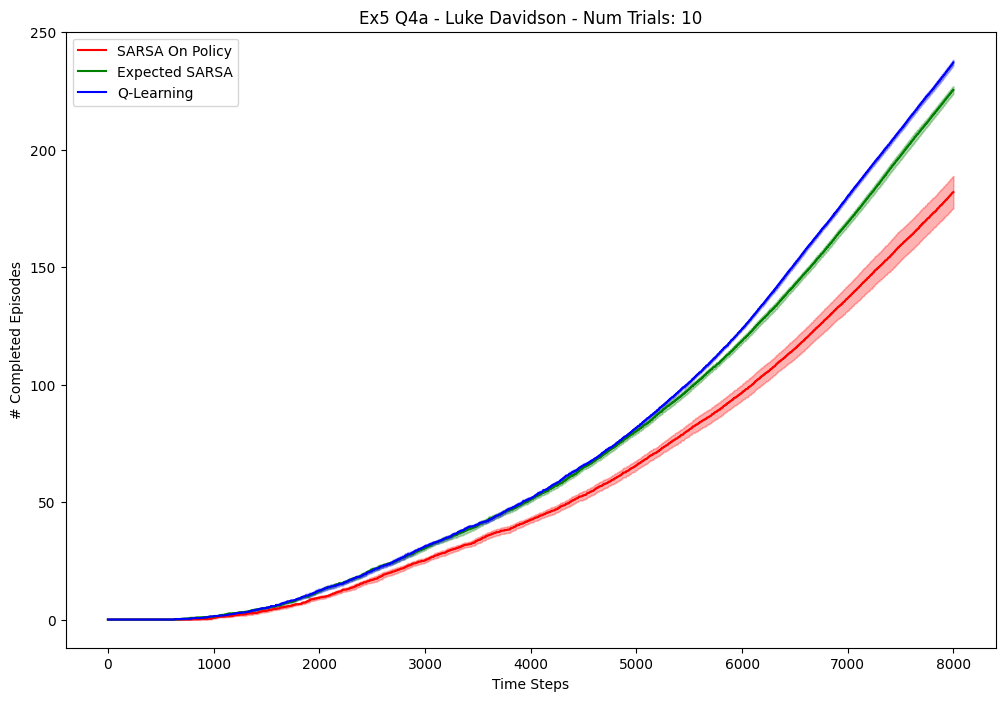

In [8]:
# Trial plotting function
def plot_indiv_trials(results_array, title):
    legend_list = []
    for i in range(results_array.shape[0]):
        plt.plot(range(8000), results_array[i, :])
        legend_list.append(f"Trial {i+1}")
    plt.title(title)
    plt.grid()
    plt.legend(legend_list)
    plt.xlabel("Time step")
    plt.ylabel("# Completed Episodes")
    plt.show()
    
# Env for part a
env = WindyGridWorld(enable_king_move=False, enable_no_move=False)

# SARSA On-Policy
results_SARSA = run_SARSA(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)
    # plot_indiv_trials(results_SARSA, "Ex5 Q4a - SARSA On Policy - Luke Davidson")

# Expected SARSA
results_expected_SARSA = run_expected_SARSA(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)
    # plot_indiv_trials(results_expected_SARSA, "Ex5 Q4a - Expected SARSA - Luke Davidson")

# Q-learning
results_Qlearning = run_Qlearning(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)
    # plot_indiv_trials(results_Qlearning, "Ex5 Q4a - Q Learning - Luke Davidson")

arr_list = [results_SARSA, results_expected_SARSA, results_Qlearning]
plot_curves(arr_list, 
            ["SARSA On Policy", "Expected SARSA", "Q-Learning"], 
            ["r", "g", "b"], 
            "# Completed Episodes", 
            "Ex5 Q4a - Luke Davidson - Num Trials: 10")


# Q4 - (b): Re-solve the Windy GridWorld with Kings' movement and No movement.

In [9]:
# SARSA with King movement            
def run_SARSA_kingmove(env, alpha, epsilon, gamma, num_timesteps, num_trials):
    
    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right", "up-right", "up-left", "down-left", "down-right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 8)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                              # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0]})                                        # Up, Down, Left, Right, Up-Right, Up-Left, Down-Left, Down-Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0, 0, 0, 0, 0]                                               # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                          # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            a, action = choose_action(epsilon, Q_sa, St)                                       # Choose e-greedy A based on S
            while done is False:                                                               # Loop until episode complete
                state_prime, reward, done = env.step(action)                                   # Take action A
                if done:                                                                       # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                a_prime, action_prime = choose_action(epsilon, Q_sa, St_prime)                 # Choose e-greedy A' based on S'
                Q_sa[St][a] += alpha*(reward + gamma*Q_sa[St_prime][a_prime] - Q_sa[St][a])    # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                          # Update S to S' and A to A'
                a, action = a_prime, action_prime
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


In [10]:
# Expected SARSA with King movement             
def run_expected_SARSA_kingmove(env, alpha, epsilon, gamma, num_timesteps, num_trials):

    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right", "up-right", "up-left", "down-left", "down-right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 8)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                    # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0]})                              # Up, Down, Left, Right, Up-Right, Up-Left, Down-Left, Down-Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0, 0, 0, 0, 0]                                     # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            while done is False:                                                     # Loop until episode complete
                a, action = choose_action(epsilon, Q_sa, St)                         # Choose e-greedy A based on S
                state_prime, reward, done = env.step(action)                         # Take action A
                if done:                                                             # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                sum_a = 0
                best_a = np.argmax(Q_sa[St_prime])                                   # Identify the action with highest chance of being selected
                for act in range(8):                                                 # Compute sum of pi(a|S')*Q(S', a)
                    if act == best_a:
                        sum_a += ((1-epsilon) + epsilon/8)*Q_sa[St_prime][act]
                    else:
                        sum_a += (epsilon/8)*Q_sa[St_prime][act]
                Q_sa[St][a] += alpha*(reward + gamma*sum_a - Q_sa[St][a])            # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                # Update S to S'
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


In [11]:
# Q-learning with King movement    
def run_Qlearning_kingmove(env, alpha, epsilon, gamma, num_timesteps, num_trials):

    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right", "up-right", "up-left", "down-left", "down-right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 8)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                    # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0]})                              # Up, Down, Left, Right, Up-Right, Up-Left, Down-Left, Down-Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0, 0, 0, 0, 0]                                     # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            while done is False:                                                     # Loop until episode complete
                a, action = choose_action(epsilon, Q_sa, St)                         # Choose e-greedy A based on S
                state_prime, reward, done = env.step(action)                         # Take action A
                if done:                                                             # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                max_a = np.amax(Q_sa[St_prime])                                      # Find max value over all actions of Q(S', a)
                Q_sa[St][a] += alpha*(reward + gamma*max_a - Q_sa[St][a])            # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                # Update S to S'
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master
        

<Figure size 640x480 with 0 Axes>

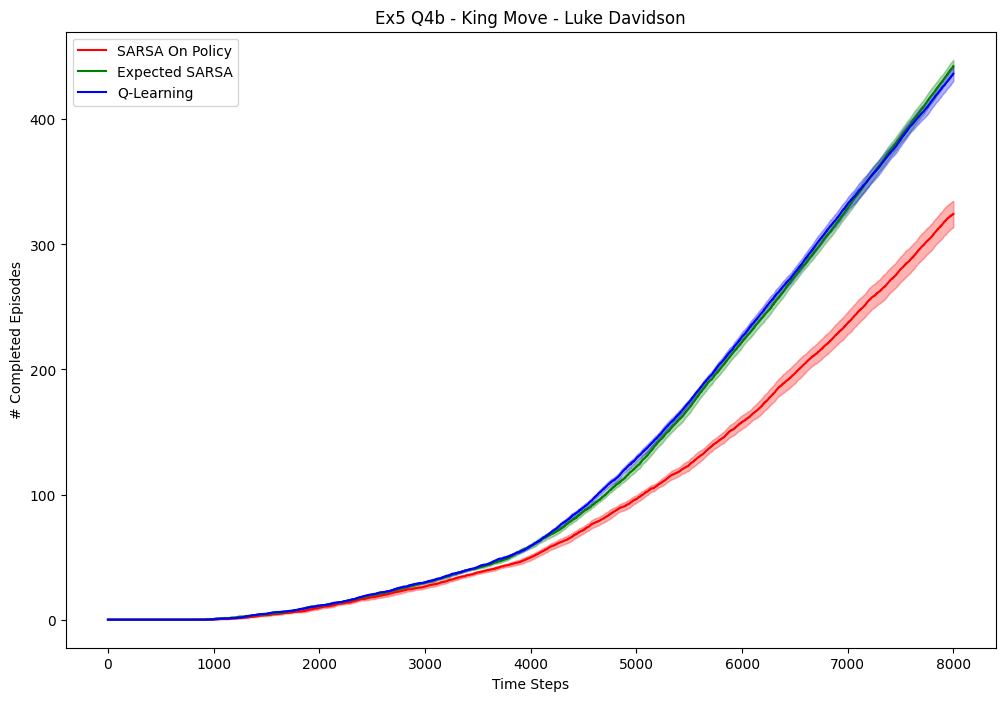

In [12]:
# Env for part b - king move
env = WindyGridWorld(enable_king_move=True, enable_no_move=False)

# SARSA On-Policy
results_SARSA = run_SARSA_kingmove(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)

# Expected SARSA
results_expected_SARSA = run_expected_SARSA_kingmove(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)

# Q-learning
results_Qlearning = run_Qlearning_kingmove(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)

arr_list = [results_SARSA, results_expected_SARSA, results_Qlearning]
plot_curves(arr_list, 
            ["SARSA On Policy", "Expected SARSA", "Q-Learning"], 
            ["r", "g", "b"], 
            "# Completed Episodes", 
            "Ex5 Q4b - King Move - Luke Davidson")


In [13]:
# SARSA without king movement
def run_SARSA_kingnomove(env, alpha, epsilon, gamma, num_timesteps, num_trials):
    
    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right", "up-right", "up-left", "down-left", "down-right", "stay"]
        if random.random() < epsilon:
            a = np.random.randint(0, 9)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                              # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0, 0]})                                     # Up, Down, Left, Right, Up-Right, Up-Left, Down-Left, Down-Right, Stay
        Q_sa["Y3_X7"] = [0, 0, 0, 0, 0, 0, 0, 0, 0]                                            # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                          # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            a, action = choose_action(epsilon, Q_sa, St)                                       # Choose e-greedy A based on S
            while done is False:                                                               # Loop until episode complete
                state_prime, reward, done = env.step(action)                                   # Take action A
                if done:                                                                       # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                a_prime, action_prime = choose_action(epsilon, Q_sa, St_prime)                 # Choose e-greedy A' based on S'
                Q_sa[St][a] += alpha*(reward + gamma*Q_sa[St_prime][a_prime] - Q_sa[St][a])    # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                          # Update S to S' and A to A'
                a, action = a_prime, action_prime
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


In [14]:
# Expected SARSA without king movement
def run_expected_SARSA_kingnomove(env, alpha, epsilon, gamma, num_timesteps, num_trials):

    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right", "up-right", "up-left", "down-left", "down-right", "stay"]
        if random.random() < epsilon:
            a = np.random.randint(0, 9)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                    # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0, 0]})                           # Up, Down, Left, Right, Up-Right, Up-Left, Down-Left, Down-Right, Stay
        Q_sa["Y3_X7"] = [0, 0, 0, 0, 0, 0, 0, 0, 0]                                  # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            while done is False:                                                     # Loop until episode complete
                a, action = choose_action(epsilon, Q_sa, St)                         # Choose e-greedy A based on S
                state_prime, reward, done = env.step(action)                         # Take action A
                if done:                                                             # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                sum_a = 0
                best_a = np.argmax(Q_sa[St_prime])                                   # Identify the action with highest chance of being selected
                for act in range(9):                                                 # Compute sum of pi(a|S')*Q(S', a)
                    if act == best_a:
                        sum_a += ((1-epsilon) + epsilon/9)*Q_sa[St_prime][act]
                    else:
                        sum_a += (epsilon/9)*Q_sa[St_prime][act]
                Q_sa[St][a] += alpha*(reward + gamma*sum_a - Q_sa[St][a])            # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                # Update S to S'
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master


In [15]:
# Q-learning without king movement
def run_Qlearning_kingnomove(env, alpha, epsilon, gamma, num_timesteps, num_trials):

    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right", "up-right", "up-left", "down-left", "down-right", "stay"]
        if random.random() < epsilon:
            a = np.random.randint(0, 9)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                    # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0, 0, 0, 0, 0, 0]})                           # Up, Down, Left, Right, Up-Right, Up-Left, Down-Left, Down-Right, Stay
        Q_sa["Y3_X7"] = [0, 0, 0, 0, 0, 0, 0, 0, 0]                                  # Q_sa[terminal] = zeros

        while t < num_timesteps:
            state, done = env.reset()                                                # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            while done is False:                                                     # Loop until episode complete
                a, action = choose_action(epsilon, Q_sa, St)                         # Choose e-greedy A based on S
                state_prime, reward, done = env.step(action)                         # Take action A
                if done:                                                             # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                max_a = np.amax(Q_sa[St_prime])                                      # Find max value over all actions of Q(S', a)
                Q_sa[St][a] += alpha*(reward + gamma*max_a - Q_sa[St][a])            # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                # Update S to S'
                if t == num_timesteps:
                    break
                else:
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master
        

<Figure size 640x480 with 0 Axes>

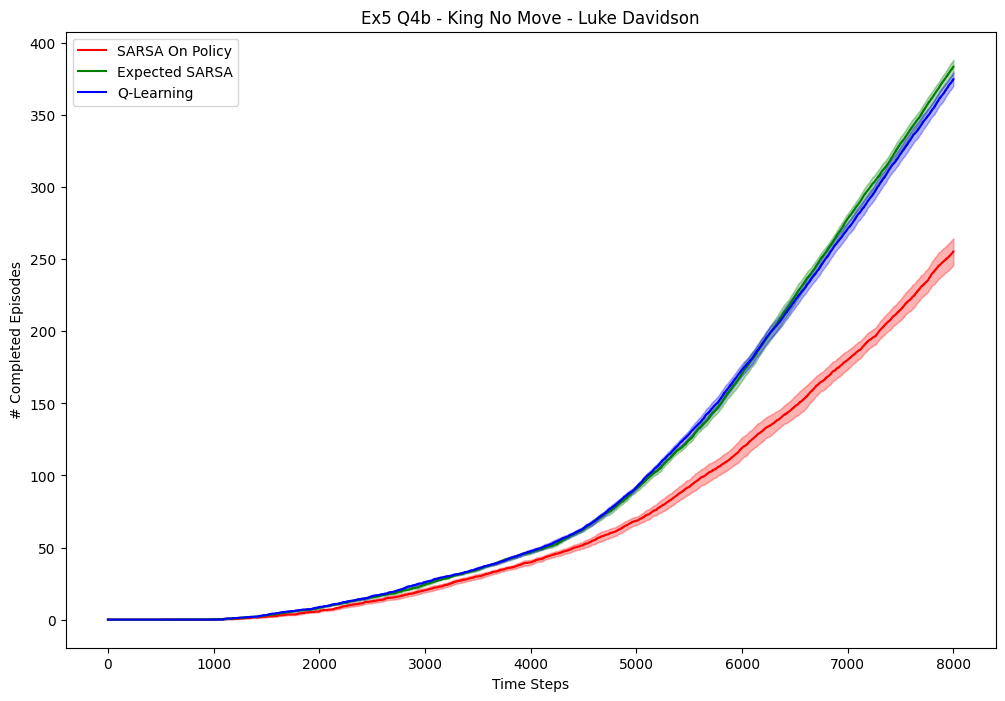

In [16]:
# Env for part b - king no move
env = WindyGridWorld(enable_king_move=True, enable_no_move=True)

# SARSA On-Policy
results_SARSA = run_SARSA_kingnomove(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)

# Expected SARSA
results_expected_SARSA = run_expected_SARSA_kingnomove(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)

# Q-learning
results_Qlearning = run_Qlearning_kingnomove(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=8000, num_trials=10)

arr_list = [results_SARSA, results_expected_SARSA, results_Qlearning]
plot_curves(arr_list, 
            ["SARSA On Policy", "Expected SARSA", "Q-Learning"], 
            ["r", "g", "b"], 
            "# Completed Episodes", 
            "Ex5 Q4b - King No Move - Luke Davidson")


# Q5: Bias-variance trade-off

In [17]:
# SARSA bias-variance trade-off            
def run_SARSA_q5(env, alpha, epsilon, gamma, num_timesteps, num_trials):
    
    # e-greedy
    def choose_action(epsilon, Q_sa, St):
        actions = ["up", "down", "left", "right"]
        if random.random() < epsilon:
            a = np.random.randint(0, 4)
        else:
            a = np.argmax(Q_sa[St])
        action = actions[a]
        return a, action

    # Initialize results array
    results_master = np.empty((num_trials, num_timesteps))

    # Main loop
    for trial in range(num_trials):
        results = []
        completed_episodes = 0
        t = 0
        Q_sa = {}                                                                              # Initialize Q_sa to zeros
        for ss in env.state_space:
            St = "Y" + str(ss[0]) + "_X" + str(ss[1])
            Q_sa.update({St: [0, 0, 0, 0]})                                                    # Up, Down, Left, Right
        Q_sa["Y3_X7"] = [0, 0, 0, 0]                                                           # Q_sa[terminal] = zeros

        while t < num_timesteps:
            ep_step = 0
            state, done = env.reset()                                                          # Reset env for first run or after completion
            St = "Y" + str(state[0]) + "_X" + str(state[1])
            a, action = choose_action(epsilon, Q_sa, St)                                       # Choose e-greedy A based on S
            while done is False:                                                               # Loop until episode complete
                state_prime, reward, done = env.step(action)                                   # Take action A
                if done:                                                                       # Check for reaching goal, if so add 1 to completed episodes
                    completed_episodes += 1
                St_prime = "Y" + str(state_prime[0]) + "_X" + str(state_prime[1])
                a_prime, action_prime = choose_action(epsilon, Q_sa, St_prime)                 # Choose e-greedy A' based on S'
                Q_sa[St][a] += alpha*(reward + gamma*Q_sa[St_prime][a_prime] - Q_sa[St][a])    # Compute Q(S, A)
                env.state, St = state_prime, St_prime                                          # Update S to S' and A to A'
                a, action = a_prime, action_prime
                if t == num_timesteps:
                    break
                else:
                    ep_step += 1
                    t += 1
                results.append(completed_episodes)
        results_master[trial, :] = results
    return results_master, Q_sa

        


In [18]:
# Now want to estimate V for TD(0) and MC with N = {1, 10, 50} episodes

# Temporal Difference implementation

def V_TD0(env, pi_star, alpha, gamma, epsilon, num_episodes):
    
    V = {}                                                                      # Initialize V for every state
    for ss in env.state_space:
        St = "Y" + str(ss[0]) + "_X" + str(ss[1])
        V.update({St: 0})
        
    for ep in range(num_episodes):
        if ep%1000 == 0 and ep > 0:
            print(f"Episode {ep}...")
        num_steps = 0
        state, done = env.reset()
        St = "Y" + str(state[0]) + "_X" + str(state[1])
        while done is False:
            if random.random() < epsilon:                                       # With an epsilon % chance, choose randomly
                # Random action
                A = ["up", "down", "left", "right"][np.random.randint(0, 4)]
            else:                                                               # Else choose optimal action
                A = pi_star[St]
            S_prime, R, done = env.step(A)                                      # Take action A, observe S' and R
            St_prime = "Y" + str(S_prime[0]) + "_X" + str(S_prime[1])
            V[St] += alpha*(R + gamma*V[St_prime] - V[St])                      # Update V(S)
            St = St_prime                                                       # Set S = S'
            num_steps += 1
    return V



# Monte-Carlo First Visit Implementation

def V_MC(env, pi_star, alpha, gamma, epsilon, num_episodes):
    
    V = {}                                                                      # Initialize V for every state
    returns = {}
    for ss in env.state_space:
        St = "Y" + str(ss[0]) + "_X" + str(ss[1])
        V.update({St: 0})
        returns.update({St: []})
    
    for ep in range(num_episodes):
        if ep%1000 == 0 and ep > 0:
            print(f"Episode {ep}...")
        num_steps = 0
        state, done = env.reset()
        St = "Y" + str(state[0]) + "_X" + str(state[1])

        # create an episode: states, actions, and rewards list where the order goes
        # s[0], a[0], r[1], s[1], a[1], r[2], ..., s[T-1], a[T-1], r[T]
        states = [state]                                                        # Initialize states, actions, rewards list for episode
        actions = []
        rewards = [None]

        while done is False:
            if random.random() < epsilon:                                       # With an epsilon % chance, choose randomly
                # Random action
                A = ["up", "down", "left", "right"][np.random.randint(0, 4)]
            else:                                                               # Else choose optimal action
                A = pi_star[St]
            S_prime, R, done = env.step(A)                                      # Take action A, observe S' and R
            St_prime = "Y" + str(S_prime[0]) + "_X" + str(S_prime[1])
            St = St_prime
            if done is False:                                                   # append results to lists
                states.append(S_prime)
            actions.append(A)
            rewards.append(R)
            num_steps += 1

        # now you have your episode, compute G and V(s)
        G = 0
        T = len(actions)
        for t in reversed(range(T)):                                            # Iterate through backwards
            G = gamma*G + rewards[t+1]                                          # G = gamma*G + R(t+1)
            if states[t] in states[:t]:                                         # First visit implementation
                pass
            else:
                St = "Y" + str(states[t][0]) + "_X" + str(states[t][1])
                returns[St].append(G)                                           # Append return
                V[St] = sum(returns[St])/len(returns[St])                       # V(S) = avg(returns(S))
                
    return V, returns


In [22]:
# Now generate evaluation episodes

def generate_episodes(env, pi_star, num_ep, epsilon):
    """
    Generates "num_ep" (int) episodes similar to the episode process in MC above,
        but instead of calculating V(S), just calculate and append G for future 
        target calculations.
    """
    results = []
    for ep in range(num_ep):
        num_steps = 0
        state, done = env.reset()
        St = "Y" + str(state[0]) + "_X" + str(state[1])

        # create an episode: states, actions, and rewards list where the order goes
        # s[0], a[0], r[1], s[1], a[1], r[2], ..., s[T-1], a[T-1], r[T]
        states = [state]
        actions = []
        rewards = [None]

        while done is False:
            if random.random() < epsilon:
                # Random action
                A = ["up", "down", "left", "right"][np.random.randint(0, 4)]
            else:
                A = pi_star[St]
            S_prime, R, done = env.step(A)
            St_prime = "Y" + str(S_prime[0]) + "_X" + str(S_prime[1])
            St = St_prime
            if done is False:
                states.append(S_prime)
            actions.append(A)
            rewards.append(R)
            num_steps += 1
        
        # now you have your episode, compute G
        Gs = []
        G = 0
        T = len(actions)
        for t in reversed(range(T)):
            G = 0.99*G + rewards[t+1]
            Gs.append(G)
        results.append((states, actions, rewards, Gs))
    return results
        

In [23]:
# Now want to calculate targets and bin the results

def calc_targets(episodes, V_TD):
    targets_TD = []
    targets_MC = []
    for i in range(len(episodes)):
        states, actions, rewards, Gs = episodes[i]
        
        # TD = R + V(S')
        St_prime = "Y" + str(states[1][0]) + "_X" + str(states[1][1])
        targets_TD.append(rewards[1] + V_TD[St_prime])
        
        # MC = G
        targets_MC.append(Gs[-1])

    return targets_TD, targets_MC

def plot_bins(targets_TD, targets_MC, true_target, N, bins):
    # TD
    plt.hist(targets_TD, bins=4)
    plt.plot(np.ones(800)*true_target, range(800), "r", linewidth=1)
    plt.title(f"Ex5 Q5 - TD Targets; N = {N} - Luke Davidson")
    plt.ylabel("# TD Targets")
    plt.xlabel("TD Target = R + V(S')")
    plt.show()
    
    # MC
    plt.hist(targets_MC, bins=bins)
    plt.plot(np.ones(350)*true_target, range(350), "r")
    plt.title(f"Ex5 Q5 - MC Targets; N = {N} - Luke Davidson")
    plt.ylabel("# MC Targets")
    plt.xlabel("MC Target = G")
    plt.show()



***** Finding estimate of V*(start_state) based on N = 5000 *****

Calculating V*(start_state) for TD...

Episode 1000...
Episode 2000...
Episode 3000...
Episode 4000...

	TD V*(start_state) = -27.640521333267724

Calculating V*(start_state) for MC...

Episode 1000...
Episode 2000...
Episode 3000...
Episode 4000...

	MC V*(start_state) = -29.0264

***** Avg V*(start_state) = -28.333 *****




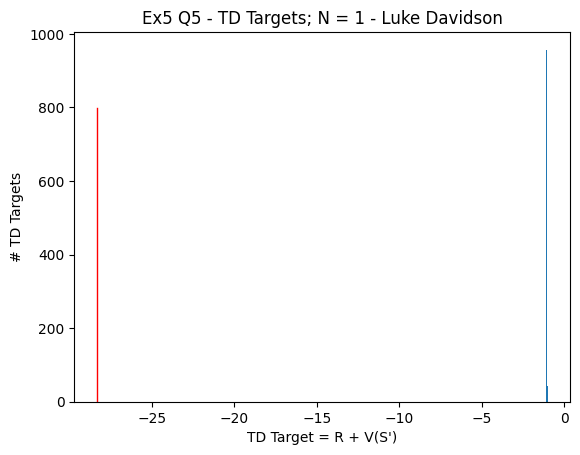

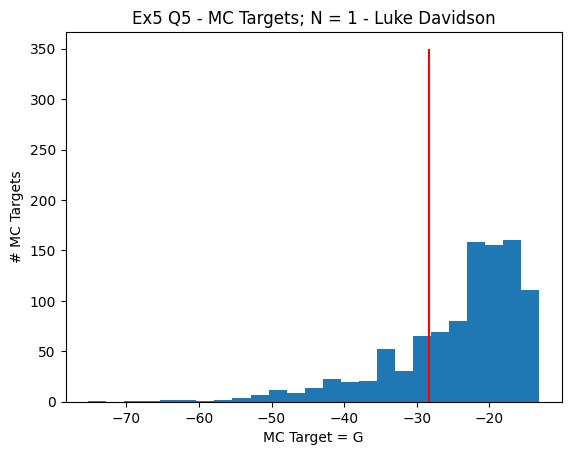

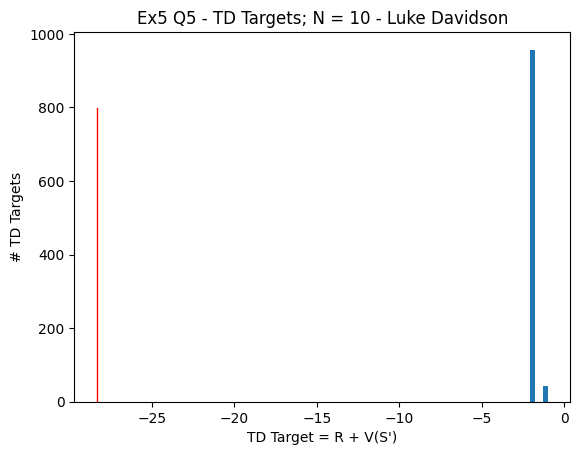

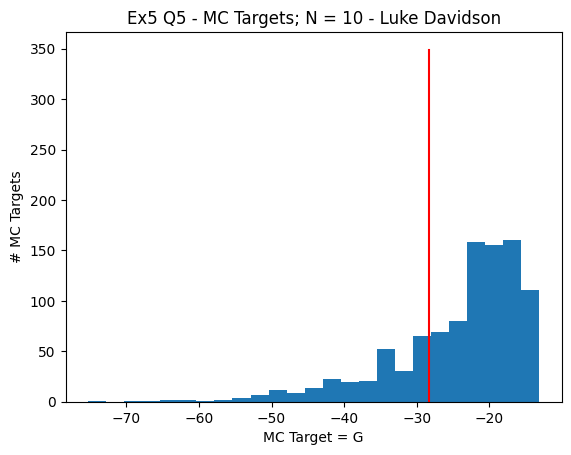

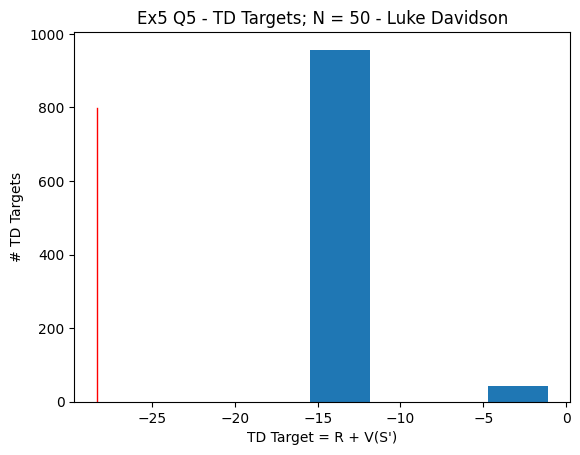

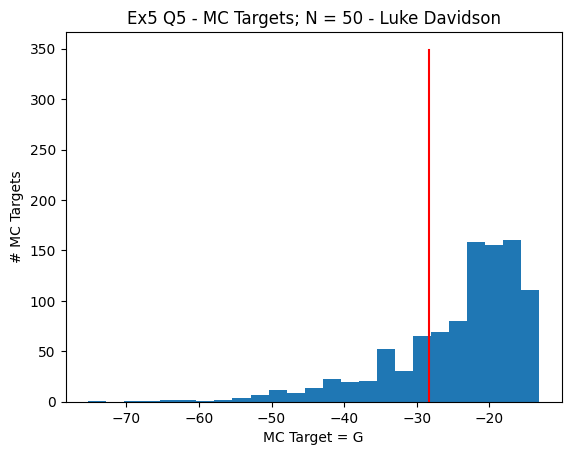

In [24]:
# RUN ALL

# Create env
env = WindyGridWorld(enable_king_move=False, enable_no_move=False)

# Find optimal Q(S, A) after SARSA (from part 4a)
results_SARSA, Q_sa_optimal = run_SARSA_q5(env, alpha=0.5, epsilon=0.1, gamma=1, num_timesteps=10000, num_trials=1)

# Find optimal policy pi*
pi_star = {}
actions = ["up", "down", "left", "right"]
for key, value in Q_sa_optimal.items():
    pi_star.update({key: actions[np.argmax(value)]})

# Calculate V(S) for TD and MC for N = {1, 10, 50}
    # N = 1
N = 1
V_tempdiff_1 = V_TD0(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
V_montecarlo_1, returns_1 = V_MC(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
    # N = 10
N = 10
V_tempdiff_10 = V_TD0(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
V_montecarlo_10, returns_10 = V_MC(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
    # N = 50
N = 50
V_tempdiff_50 = V_TD0(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
V_montecarlo_50, returns_50 = V_MC(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
    # N = large to find approx V*(start) for both methods
N = 5000
print(f"\n***** Finding estimate of V*(start_state) based on N = {N} *****\n")
print("Calculating V*(start_state) for TD...\n")
V_tempdiff_star = V_TD0(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
V_start_star_TD = V_tempdiff_star["Y3_X0"]
print(f"\n\tTD V*(start_state) = {V_start_star_TD}")
print("\nCalculating V*(start_state) for MC...\n")
V_montecarlo_star, returns_star = V_MC(env, pi_star, alpha=0.1, gamma=1, epsilon=0.1, num_episodes=N)
V_start_star_MC = V_montecarlo_star["Y3_X0"]
print(f"\n\tMC V*(start_state) = {V_start_star_MC}")
V_start_star = (V_start_star_TD+V_start_star_MC)/2
print(f"\n***** Avg V*(start_state) = {round(V_start_star, 3)} *****\n\n")

# Generate test episodes
num_ep = 1000
episodes = generate_episodes(env, pi_star, num_ep, epsilon=0.1)

# Calc targets
targets_TD_1, targets_MC_1 = calc_targets(episodes, V_tempdiff_1)
targets_TD_10, targets_MC_10 = calc_targets(episodes, V_tempdiff_10)
targets_TD_50, targets_MC_50 = calc_targets(episodes, V_tempdiff_50)

# Plots
bins = 25
plot_bins(targets_TD_1,  targets_MC_1, V_start_star,   1, bins=bins)
plot_bins(targets_TD_10, targets_MC_10, V_start_star, 10, bins=bins)
plot_bins(targets_TD_50, targets_MC_50, V_start_star, 50, bins=bins)